In [1]:
from preprocessing import *
import pandas as pd
import os
from fst4conll import *
from conll import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%%bash
dpath='NL2SparQL4NLU/dataset/NL2SparQL4NLU'
spath='dataset'
mkdir -p 'dataset'

cp $dpath.train.utterances.txt $spath/trn.txt
cp $dpath.test.utterances.txt $spath/tst.txt

cp $dpath.train.conll.txt $spath/trn.conll
cp $dpath.test.conll.txt $spath/tst.conll

## Data Analysis

In [3]:
if not os.path.exists('data_analysis'):
    os.makedirs('data_analysis')
    
tf_min=1
#TRAIN
trn_data = read_corpus('dataset/trn.txt')
trn_lex, out = cutoff(trn_data, tf_min)

trn = read_corpus_conll('dataset/trn.conll')
trn_tags = get_column(trn, column=-1)
tag_lex, out_tag = cutoff(trn_tags, tf_min)

print("Number of train sentences: ",len(trn_data))
print("Number of train unique words: ",len(trn_lex))
print("Number of train unique IOB-tags :",len(tag_lex))
print("\n")
#TEST
tst_data = read_corpus('dataset/tst.txt')
tst_lex, out = cutoff(tst_data, tf_min)

tst = read_corpus_conll('dataset/tst.conll')
tst_tags = get_column(tst, column=-1)
tag_lex, out_tag = cutoff(tst_tags, tf_min)

print("Number of test sentences: ",len(tst_data))
print("Number of test unique words: ",len(tst_lex))
print("Number of test unique IOB-tags :",len(tag_lex))

Number of train sentences:  3338
Number of train unique words:  1729
Number of train unique IOB-tags : 41


Number of test sentences:  1084
Number of test unique words:  1039
Number of test unique IOB-tags : 39


## Zipf's Law

Words in train set with frequency 1:  779


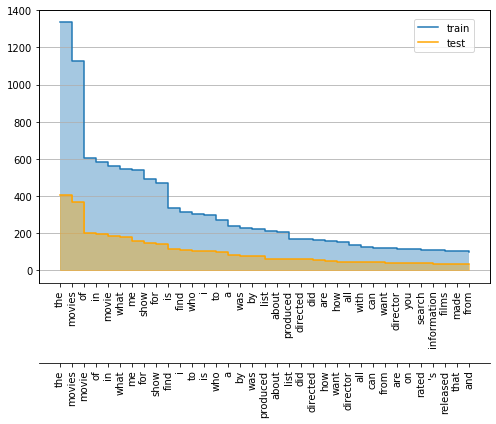

In [62]:
from collections import defaultdict

w_count = defaultdict(int)
for s in trn_data:
    for i in range(len(s)):
        w_count[s[i]] += 1
        
sorted_w_count = sorted(w_count.items(), key=lambda kv: kv[1], reverse=True)

wt_count = defaultdict(int)
for s in tst_data:
    for i in range(len(s)):
        wt_count[s[i]] += 1
        
sorted_wt_count = sorted(wt_count.items(), key=lambda kv: kv[1], reverse=True)

x,y = [],[]
x_t,y_t = [],[]

for i in range(35):   
    x.append(sorted_w_count[i][0])
    y.append(sorted_w_count[i][1])

    
for i in range(35):   
    x_t.append(sorted_wt_count[i][0])
    y_t.append(sorted_wt_count[i][1])

        
fig, ax = plt.subplots(1,1,figsize=(7,6))
ax.step(x,y, where='post',label="train")
ax.fill_between(x,y, step="post", alpha=0.4)

ax2 = ax.twiny()

ax2.step(x_t,y_t, where='post',color='orange',label="test")
ax2.fill_between(x_t,y_t, step="post", alpha=0.4,color='orange')

ax.set_xticklabels(x,rotation=90)

ax2.xaxis.set_ticks_position('bottom')
ax2.spines['bottom'].set_position(('outward', 80))
ax2.set_xticklabels(x_t,rotation=90)

ax.yaxis.grid()
fig.tight_layout()

fig.legend(bbox_to_anchor=(0.95, 0.95))
fig.show(warn=False)
fig.savefig("data_analysis/trn_zipf.png")

freq1 = 0
for i in range(len(w_count)):
    if sorted_w_count[i][1] == 1:
        freq1 += 1
        
print("Words in train set with frequency 1: ",freq1)

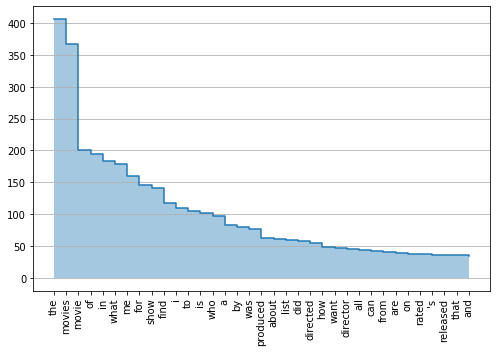

In [13]:
w_count = defaultdict(int)
for s in tst_data:
    for i in range(len(s)):
        w_count[s[i]] += 1
        
sorted_w_count = sorted(w_count.items(), key=lambda kv: kv[1], reverse=True)

x,y = [],[]
xticks,yticks = [],[]

for i in range(35):   
    x.append(sorted_w_count[i][0])
    y.append(sorted_w_count[i][1])
    xticks.append(sorted_w_count[i][0])
    yticks.append(sorted_w_count[i][1])
        
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.step(x,y, where='post')
ax.fill_between(x,y, step="post", alpha=0.4)
ax.set_xticklabels(x,rotation=90)
ax.yaxis.grid()
fig.tight_layout()
fig.show(warn=False)
#fig.savefig("data_analysis/trn_zipf.png")

## Concept ditribution

In [6]:
trn_c_count = defaultdict(int)
tst_c_count = defaultdict(int)
tst_concept = []

for t in trn_tags:
    for i in range(len(t)):
        concept = t[i]
        if concept.startswith("B-") or concept.startswith("I-"):
            concept = concept[2:]
        trn_c_count[concept] += 1

sorted_trn_c_count = sorted(trn_c_count.items(), key=lambda kv: kv[1], reverse=True)

for t in tst_tags:
    for i in range(len(t)):
        concept = t[i]
        if concept.startswith("B-") or concept.startswith("I-"):
            concept = concept[2:]  
        tst_concept.append(concept)
        tst_c_count[concept] += 1

sorted_tst_c_count = sorted(tst_c_count.items(), key=lambda kv: kv[1], reverse=True)
        
print(sorted_trn_c_count)
print(sorted_tst_c_count)

[('O', 15391), ('movie.name', 3157), ('director.name', 455), ('actor.name', 437), ('producer.name', 336), ('person.name', 280), ('movie.subject', 247), ('rating.name', 240), ('country.name', 212), ('movie.language', 207), ('movie.release_date', 201), ('movie.genre', 98), ('character.name', 97), ('movie.gross_revenue', 34), ('movie.location', 21), ('award.ceremony', 13), ('movie.release_region', 10), ('actor.nationality', 6), ('actor.type', 3), ('director.nationality', 2), ('person.nationality', 2), ('movie.description', 2), ('movie.star_rating', 1), ('award.category', 1)]
[('O', 5135), ('movie.name', 1030), ('actor.name', 157), ('director.name', 156), ('producer.name', 121), ('movie.language', 72), ('movie.release_date', 70), ('rating.name', 69), ('country.name', 67), ('person.name', 66), ('movie.subject', 59), ('movie.genre', 37), ('character.name', 21), ('movie.gross_revenue', 20), ('movie.location', 11), ('award.ceremony', 7), ('movie.release_region', 6), ('movie.type', 4), ('award.

In [7]:
tot = 0
freq1 = 0
for i in sorted_trn_c_count:
    if i[0] == 'O':
        O = i[1]
    tot += i[1]
    
    if i[1] == 1:
        freq1+=1
    
print("Percentage of O-tag in train set: "+str(round(O/tot*100,2))+"%")
print("Tags in train set with frequency 1: ",freq1)

tot = 0
for i in sorted_tst_c_count:
    if i[0] == 'O':
        O = i[1]
    tot += i[1]
    
print("Percentage of O-tag in test set: "+str(round(O/tot*100,2))+"%")

Percentage of O-tag in train set: 71.74%
Tags in train set with frequency 1:  2
Percentage of O-tag in test set: 72.15%
